# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_duplicate = mouse_study_complete.loc[mouse_study_complete.duplicated(subset = ['Timepoint','Mouse ID']), 'Mouse ID'].unique()
mouse_study_duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_duplicate_df = mouse_study_complete[mouse_study_complete["Mouse ID"] == "g989"]
mouse_study_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_duplicate_df_drop = mouse_study_complete[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_duplicate_df_drop.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_drop_duplicate = mouse_study_duplicate_df_drop["Mouse ID"].nunique()
mouse_count_drop_duplicate

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_tumor_mean = mouse_study_duplicate_df_drop["Tumor Volume (mm3)"].groupby(mouse_study_duplicate_df_drop["Drug Regimen"]).mean()
mouse_tumor_median = mouse_study_duplicate_df_drop["Tumor Volume (mm3)"].groupby(mouse_study_duplicate_df_drop["Drug Regimen"]).median()
mouse_tumor_variance = mouse_study_duplicate_df_drop["Tumor Volume (mm3)"].groupby(mouse_study_duplicate_df_drop["Drug Regimen"]).var()
mouse_tumor_std = mouse_study_duplicate_df_drop["Tumor Volume (mm3)"].groupby(mouse_study_duplicate_df_drop["Drug Regimen"]).std()
mouse_tumor_sem = mouse_study_duplicate_df_drop["Tumor Volume (mm3)"].groupby(mouse_study_duplicate_df_drop["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_tumor_summary = pd.DataFrame ({"Mean Tumor Volume":mouse_tumor_mean, 
                            "Median Tumor Volume":mouse_tumor_median, 
                           "Tumor Volume Variance":mouse_tumor_variance, 
                           "Tumor Volume Std. Dev.":mouse_tumor_std, 
                           "Tumor Volume Std. Err.":mouse_tumor_sem})
mouse_tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_summary = mouse_study_duplicate_df_drop.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Ketapril'),
 Text(3, 0, 'Naftisol'),
 Text(4, 0, 'Zoniferol'),
 Text(5, 0, 'Stelasyn'),
 Text(6, 0, 'Placebo'),
 Text(7, 0, 'Infubinol'),
 Text(8, 0, 'Ceftamin'),
 Text(9, 0, 'Propriva')]

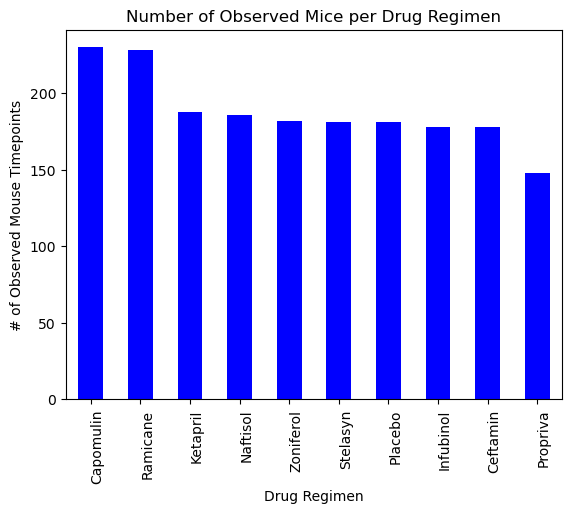

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data = mouse_study_duplicate_df_drop["Drug Regimen"].value_counts()
bar_chart = mouse_data.plot(kind="bar", facecolor="blue", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
xticklabels = mouse_data.index
plt.title("Number of Observed Mice per Drug Regimen")
bar_chart.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

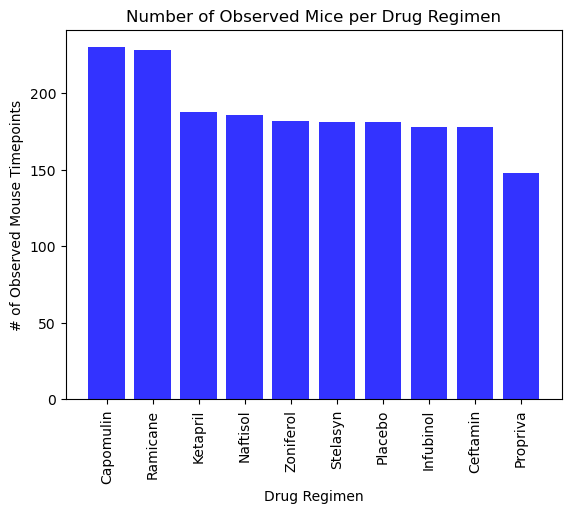

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_data.index.values
y_axis = mouse_data.values
plt.bar(x_axis, y_axis, color='blue', alpha=0.8, align='center')
plt.title("Number of Observed Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

<Axes: title={'center': 'Distribution of Mice Gender'}, ylabel='Sex'>

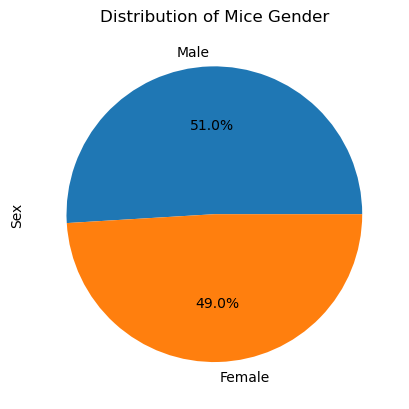

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_duplicate_df_drop["Sex"].value_counts()
mouse_sex.plot.pie(autopct= "%1.1f%%", ylabel= "Sex", title="Distribution of Mice Gender")
          
          

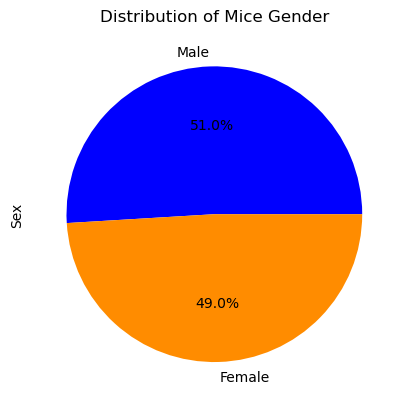

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = mouse_study_duplicate_df_drop["Sex"].value_counts()
labels = "Male", "Female"
colors = "blue", "darkorange"
plt.pie(sex_labels, labels=labels, colors=colors,autopct="%1.1f%%")
plt.title("Distribution of Mice Gender")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_duplicate_df_drop.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_timepoint.merge(mouse_study_duplicate_df_drop, on = ["Mouse ID", "Timepoint"], how = "left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merge_df.loc[merge_df["Drug Regimen"]==drug,'Tumor Volume (mm3)']
    
    # add subset 
    volume_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    
    if treatments == 0:
        print(f"--------------------------------------------------------")
    print(f"The {drug} treament lower quartile of is: {lowerq}" )
    print(f"The {drug} treatment upper quartile of is: {upperq}")
    print(f"The {drug} treatment interquartile range of is: {iqr}")
    print(f"The {drug} treatment values below {lower_bound} could be outliers")
    print(f"The {drug} treatment values above {upper_bound} could be outliers")
    print(f"-------------------------------------------------------------")
 

The Capomulin treament lower quartile of is: 32.37735684
The Capomulin treatment upper quartile of is: 40.1592203
The Capomulin treatment interquartile range of is: 7.781863460000004
The Capomulin treatment values below 20.70456164999999 could be outliers
The Capomulin treatment values above 51.83201549 could be outliers
-------------------------------------------------------------
The Ramicane treament lower quartile of is: 31.56046955
The Ramicane treatment upper quartile of is: 40.65900627
The Ramicane treatment interquartile range of is: 9.098536719999998
The Ramicane treatment values below 17.912664470000003 could be outliers
The Ramicane treatment values above 54.30681135 could be outliers
-------------------------------------------------------------
The Infubinol treament lower quartile of is: 54.04860769
The Infubinol treatment upper quartile of is: 65.52574285
The Infubinol treatment interquartile range of is: 11.477135160000003
The Infubinol treatment values below 36.83290494

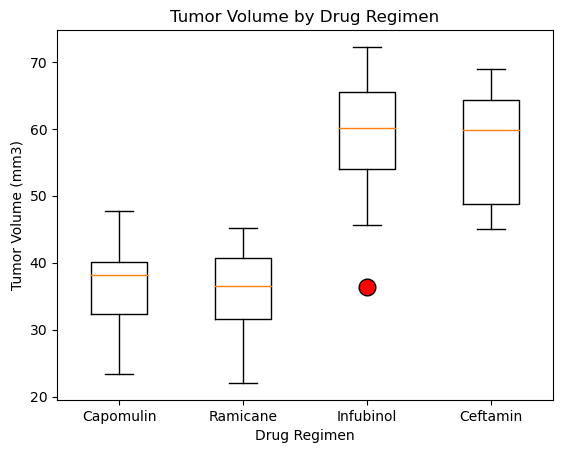

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title("Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
ax.boxplot(volume_list, flierprops=flierprops)
ax.set_xticklabels(treatments)
plt.xticks
plt.yticks
plt.show()
    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

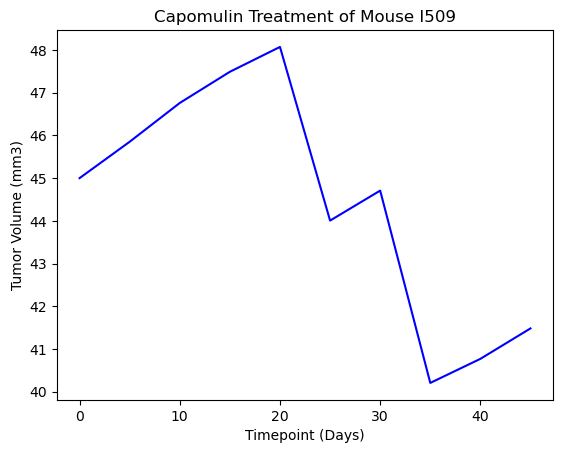

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = mouse_study_duplicate_df_drop.loc[mouse_study_duplicate_df_drop["Mouse ID"]=="l509"]

x_axis = single_mouse["Timepoint"]
tumor_volume = single_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor_volume, color = "blue")
plt.title("Capomulin Treatment of Mouse I509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

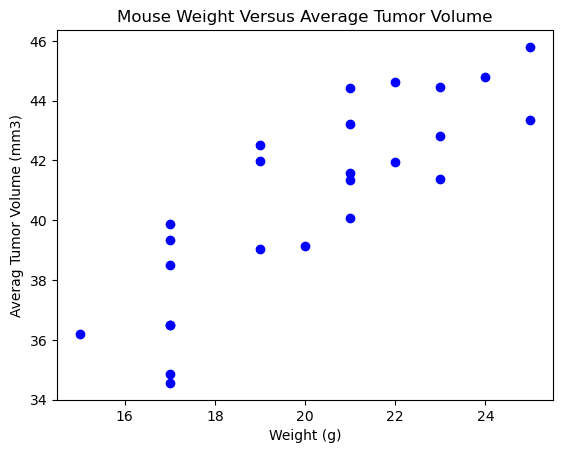

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = mouse_study_duplicate_df_drop.loc[mouse_study_duplicate_df_drop["Drug Regimen"]=="Capomulin"]
average_volume = capomulin_regimen.groupby(["Mouse ID"]).mean("Tumor Volume (mm3)")
plt.scatter(average_volume["Weight (g)"],average_volume["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


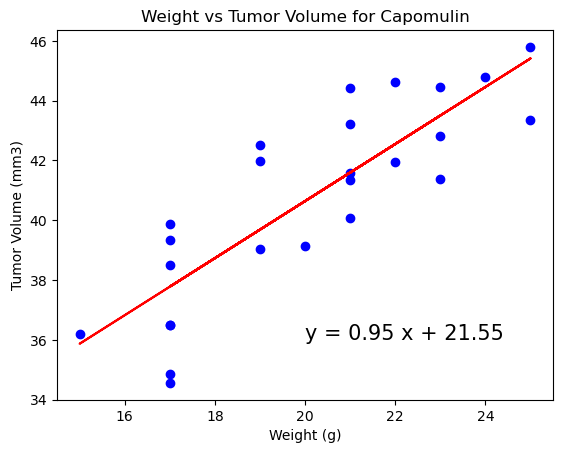

In [18]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = st.pearsonr(average_volume["Weight (g)"],average_volume["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume {round(correlation_coefficient[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = average_volume["Weight (g)"]
y_values = average_volume["Tumor Volume (mm3)"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()